In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

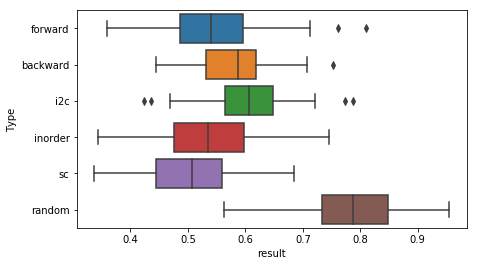

In [27]:
def draw_box(k, gid)
    path = './results/graph' + str(gid) + '/' + str(k) + '/'
    
    with open(path+'forward.txt', 'r') as f:
        F = [float(line.strip()) for line in f.readlines()]
    
    with open(path+'backward.txt', 'r') as f:
        B = [float(line.strip()) for line in f.readlines()]
    
    with open(path+'i2c.txt', 'r') as f:
        I2C = [float(line.strip()) for line in f.readlines()]
    
    with open(path+'inorder.txt', 'r') as f:
        I = [float(line.strip()) for line in f.readlines()]
    
    with open(path+'random.txt', 'r') as f:
        R = [float(line.strip()) for line in f.readlines()]
    
    with open(path+'sc.txt', 'r') as f:
        S = [float(line.strip()) for line in f.readlines()]
    
    df = pd.DataFrame(columns=('Type', 'result'))
    cnt = 0
    for x in F:
        df.loc[cnt] = ['forward', x]
        cnt += 1
    for x in B:
        df.loc[cnt] = ['backward', x]
        cnt += 1
    for x in I2C:
        df.loc[cnt] = ['i2c', x]
        cnt += 1
    for x in I:
        df.loc[cnt] = ['inorder', x]
        cnt += 1
    for x in S:
        df.loc[cnt] = ['sc', x]
        cnt += 1
    for x in R:
        df.loc[cnt] = ['random', x]
        cnt += 1
    plt.figure(figsize = (7,4))
    result = sns.boxplot(y='Type',x='result',data=df)
"""
fig = result.get_figure()
fig.savefig('box.png')
"""

In [24]:
files = ['forward.txt', 'forward_open.txt', 'backward.txt', 'backward_open.txt', 'i2c.txt', 'i2c_open.txt', 'inorder.txt', 'inorder_open.txt', 'random.txt', 'random_open.txt', 'sc.txt', 'sc_open.txt']
df = pd.DataFrame()
df['name'] =['graph' + str(gid) + ', ' + file for gid in [1, 2, 3, 4] for file in files ]
for k in range(13):
    col = []
    for gid in [1, 2, 3, 4]:
        for file in files:
            path = './results/graph' + str(gid) + '/' + str(k) + '/' + file
            with open(path, 'r') as f:
                avg = np.mean([float(line.strip()) for line in f.readlines()])
                col.append(avg)
    df[str(k)] = col

df = df.set_index('name')
df.to_excel('results.xlsx')